# HOML Ch.5 Exercise 8

## Exercise 8

### Exercise: Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

We'll be using a multiclassification toy dataset that's already been cleaned and contains various measurements of patients that that have either hernia, spondylolisthesis, or neither of the two. The dataset can be found here:
https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients

Additional datasets that are appear to already have been cleaned and are ready for machine learning analysis are located here: https://www.kaggle.com/annavictoria/ml-friendly-public-datasets

From the dataset page:
Each patient is represented in the data set by six biomechanical attributes (likely measured in degrees) derived from the shape and orientation of the pelvis and lumbar spine (each one is a column):

pelvic incidence <br>
pelvic tilt <br>
lumbar lordosis angle <br>
sacral slope <br>
pelvic radius <br>
grade of spondylolisthesis 

Just for context, we'll provide a brief description of hernia and spondylolisthesis and a couple of the features that will be most important for this exercise.

Hernia: bulging of an organ or tissue through an abnormal opening. <br>
Spondylolisthesis: spinal disorder in which a bone (vertebra) slips forward onto the bone below it. <br>
Lumbar Lordosis Angle: angle of the inward curvature of the lower back. <br>
Sacral Slope: the angle between the horizontal and the sacral plate, and is a critical spinal parameter in the analysis of sagittal balance that has been correlated to the progression of spondylolisthesis.


We'll begin by loading the necessary libraries  and the dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Load the dataset
ortho = pd.read_csv('column_3C_weka.csv')
ortho.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [4]:
ortho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [5]:
ortho.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [6]:
# Count of the class values
ortho['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

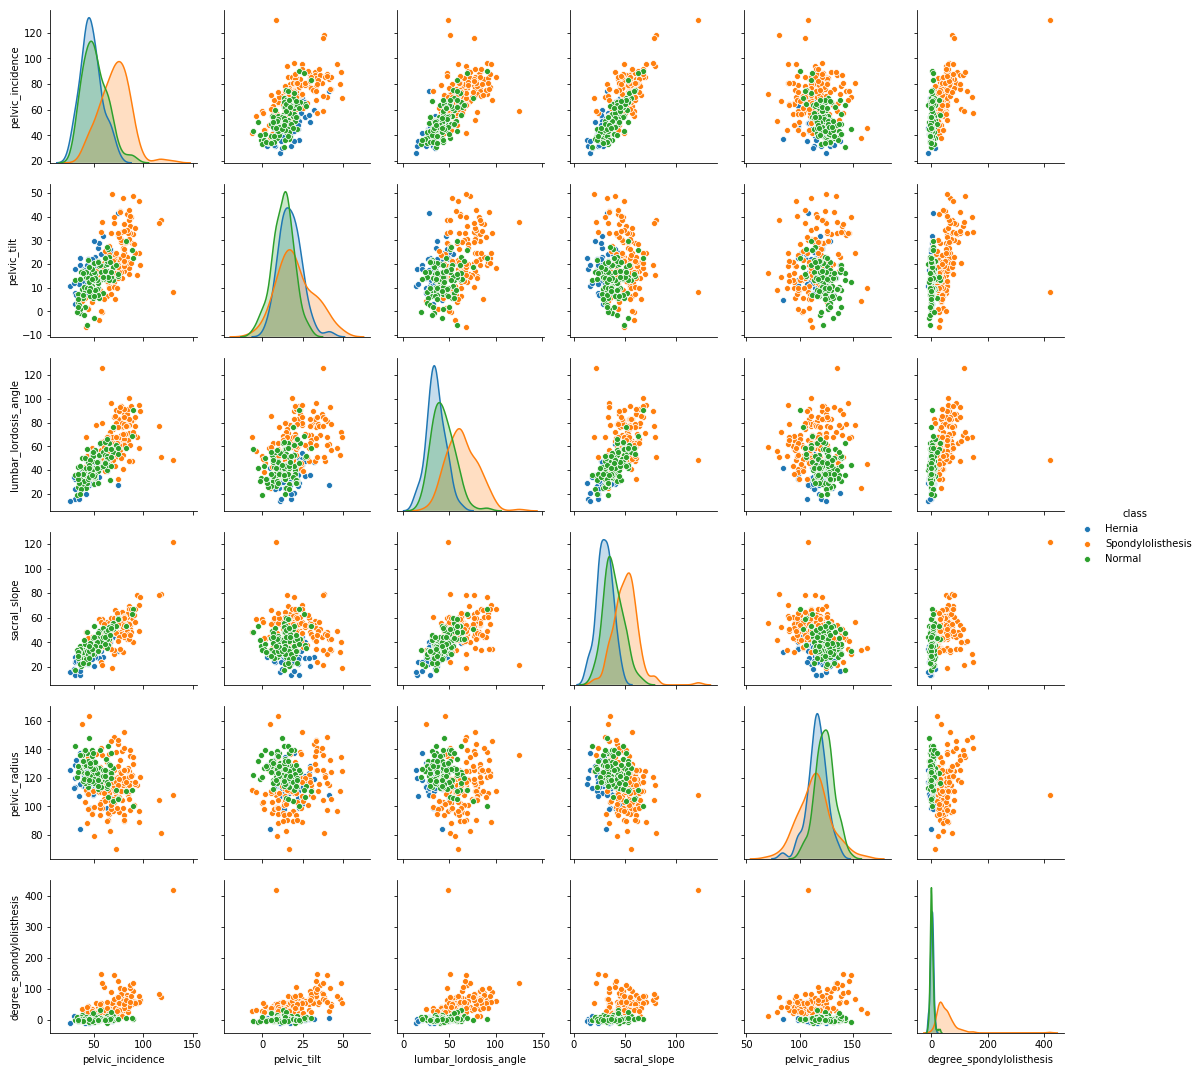

In [7]:
# Pairplot to visualize the distribution of features, colored by class.
sns.pairplot(ortho, hue='class')

We want a distribution of points in which the hued clusters are nicely separable. Lumbar lordosis plotted against sacral slope appears the most promising. Hernia and spondylolisthesis appear to have fairly strong separation. Let's use a scatter plot to take a closer look. 

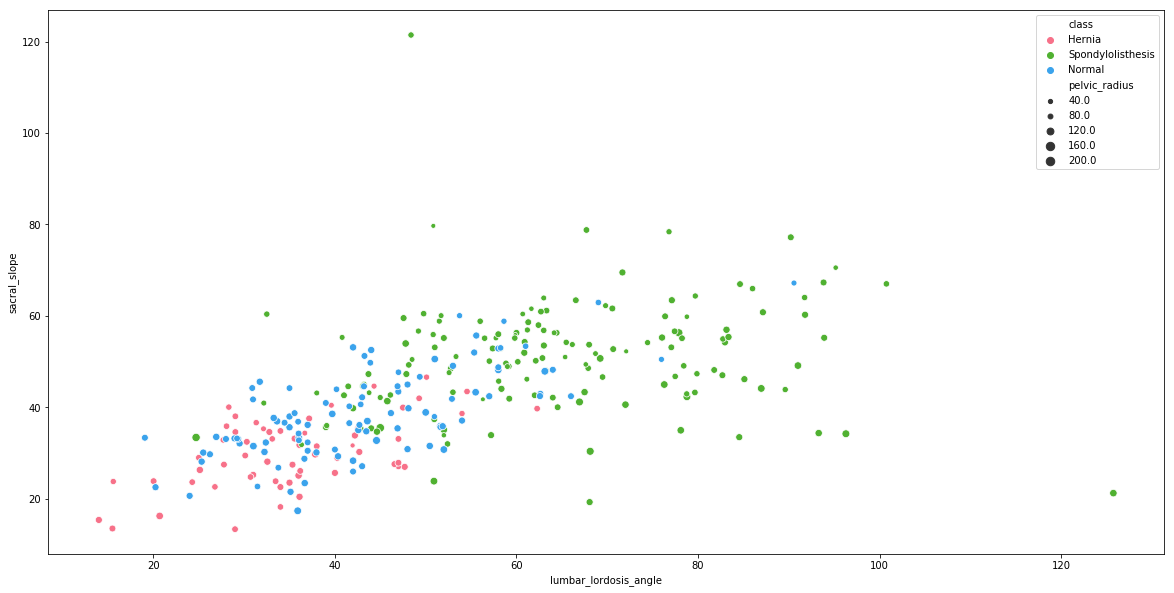

In [8]:
# Scatter plot of lumbar lordosis vs sacral slope.
plt.figure(figsize=(20,10))
sns.scatterplot(data=ortho, x='lumbar_lordosis_angle', y='sacral_slope', hue='class', palette='husl', size='pelvic_radius')

While there's some overlap in the data, hernia and spondylolisthesis are largely separate. 

In [9]:
# Convert class values from strings to integers
ortho['class'] = ortho['class'].map({'Normal':0, 'Hernia':1, 'Spondylolisthesis':2})
ortho.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


We can also take a look at the distribution of each feature with respect to class. While there is some overlap between hernia and spondylolisthesis for both lumbar lordosis angle and sacral slope, most hernia patients have lower degree values for for both features.  

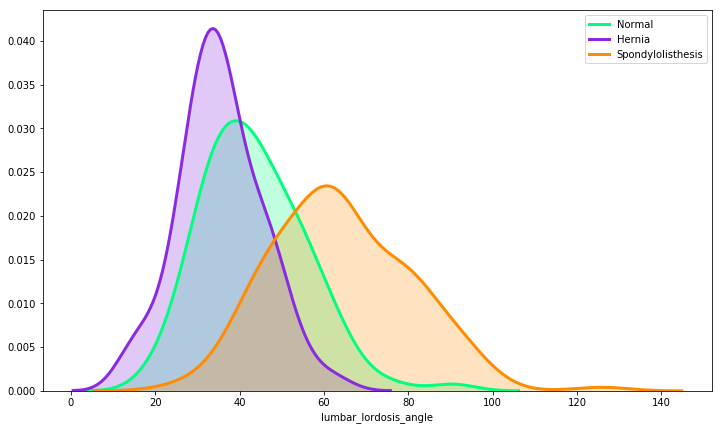

In [10]:
# KDE for lumbar lordosis angle and class
plt.figure(figsize=(12,7))
sns.distplot(ortho.loc[(ortho['class']==0), "lumbar_lordosis_angle"], color = "springgreen", hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Normal")
sns.distplot(ortho.loc[(ortho['class']==1), "lumbar_lordosis_angle"], color = "blueviolet", hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Hernia")
sns.distplot(ortho.loc[(ortho['class']==2), "lumbar_lordosis_angle"], color = "darkorange", hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Spondylolisthesis")
plt.show()

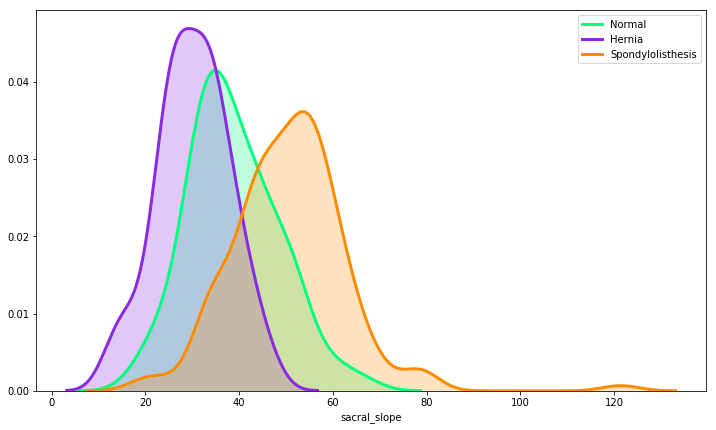

In [11]:
# KDE for sacral slope and class
plt.figure(figsize=(12,7))
sns.distplot(ortho.loc[(ortho['class']==0), "sacral_slope"], color = "springgreen", hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Normal")
sns.distplot(ortho.loc[(ortho['class']==1), "sacral_slope"], color = "blueviolet", hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Hernia")
sns.distplot(ortho.loc[(ortho['class']==2), "sacral_slope"], color = "darkorange", hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Spondylolisthesis")
plt.show()

We'll now prepare the data for machine learning by considering only lumbar_lordosis_angle and sacral_slope as our features and only hernia and spondylolisthesis as our target values. We'll then train three different classifiers - LinearSVC, SVC, SGD.

In [12]:
# Consider only lumbar_lordosis_angle and sacral_slope as features
# and only hernia and spondylolisthesis as target values
X = ortho[['lumbar_lordosis_angle', 'sacral_slope']] 
y = ortho['class']

Hernia_or_Spondylolisthesis = (y == 1) | (y == 2)
X = X[Hernia_or_Spondylolisthesis]
y = y[Hernia_or_Spondylolisthesis]

In [13]:
# Train three classifiers
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# Use C and alpha values suggested by author
C = 5
alpha = 1 / (C * len(X))  # Constant that multiplies by regularization rate. The higher the value, the stronger 
                          # the regularization.

lin_clf = LinearSVC(loss="hinge", C=C, random_state=99)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.1, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [2.18362698] [[1.76279643 1.713344  ]]
SVC:                          [2.26694115] [[1.77885675 1.82504236]]
SGDClassifier(alpha=0.00095): [2.3] [[2.05093884 1.84830675]]


With a little tuning (primarily of SGDClassifier's eta value, which sets the initial learning rate), we were able to roughly get the same coefficient values for all three classifiers.

Finally, let's take a look at our results graphically. 

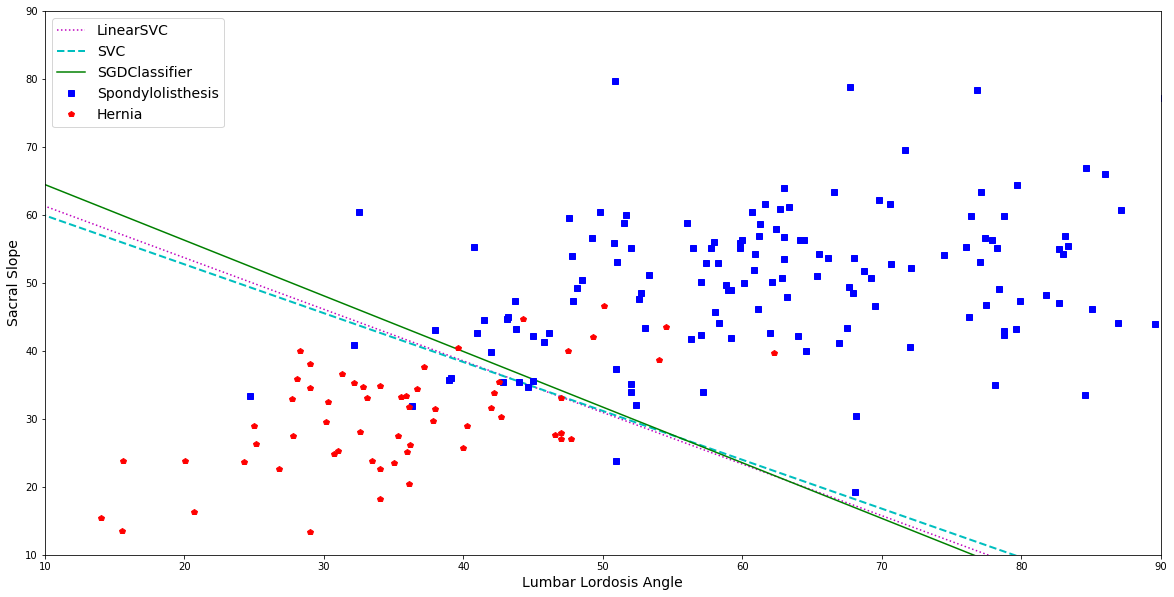

In [19]:
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(20, 10))
plt.plot(line1[:, 0], line1[:, 1], "m:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "c--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "g-", label="SGDClassifier")
plt.plot(X['lumbar_lordosis_angle'][y==2], X['sacral_slope'][y==2], "bs", label="Spondylolisthesis")
plt.plot(X['lumbar_lordosis_angle'][y==1], X['sacral_slope'][y==1], "rp", label="Hernia")
plt.xlabel("Lumbar Lordosis Angle", fontsize=14)
plt.ylabel("Sacral Slope", fontsize=14)
plt.legend(loc="upper left", fontsize=14)

plt.axis([10, 90, 10, 90])

plt.show()

As we can see, all three classifiers separate the two values in roughly the same manner.  